# Neighbourhood Cleaning Rule


1)Loại bỏ các quan sát nhiễu từ lớp đa số bằng ENN:
Khám phá 3 láng giềng gần nhất.
Sử dụng phiếu biểu quyết của các láng giềng để giữ lại các quan sát.
2)Loại bỏ các quan sát từ lớp đa số nếu:
Chúng là một trong 3 láng giềng gần nhất của một mẫu thiểu số, và
Hầu hết / tất cả 3 láng giềng gần nhất đó không thuộc lớp thiểu số, và
Lớp đa số có ít nhất một nửa số quan sát so với số quan sát trong lớp thiểu số (điều này có thể được điều chỉnh).





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import NeighbourhoodCleaningRule

## Create data

We will create data where the classes have different degrees of separateness.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [2]:
def make_data(sep):
    
    # returns arrays
    X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           class_sep=sep,# how separate the classes are
                           random_state=1)
    
    # trasform arrays into pandas df and series
    X = pd.DataFrame(X, columns =['varA', 'varB'])
    y = pd.Series(y)
    
    return X, y

## Neighbourhood Cleaning Rule

[NeighbourhoodCleaningRule](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NeighbourhoodCleaningRule.html)

### Well separated classes

In [3]:
# create data

X, y = make_data(sep=2)

# set up Neighbourhood cleaning rule

ncr = NeighbourhoodCleaningRule(
    sampling_strategy='auto',# undersamples from all classes except minority
    n_neighbors=3, # explores 3 neighbours per observation
    kind_sel='all', # all neighbouring need to disagree, only applies to cleaning step
                    # alternatively, we can se this to mode, and then most neighbours
                    # need to disagree to be removed.
    n_jobs=4, # 4 processors in my laptop
    threshold_cleaning=0.5, # the threshold to evaluate a class for cleaning (used only for clearning step)
) 

# Note, the threshold_cleaning implementation by imbalanced-learn does not 
# match what was described in the original article. At the moment, it will
# only clean observations if the class has at least threshold * X.shape[0]
# number of observations

X_resampled, y_resampled = ncr.fit_resample(X, y)

In [4]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [5]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((979, 2), (979,))

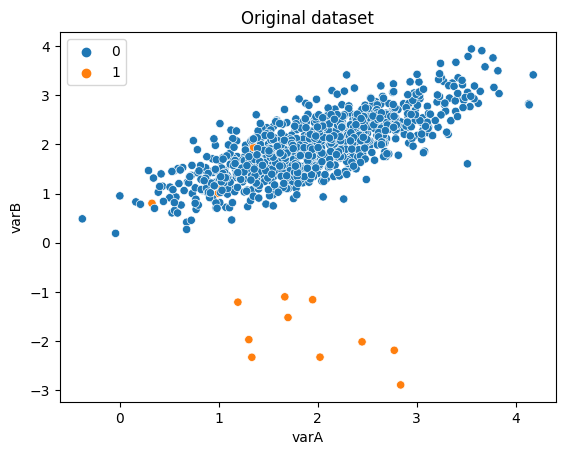

In [6]:
# plot original data

sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )

plt.title('Original dataset')
plt.show()

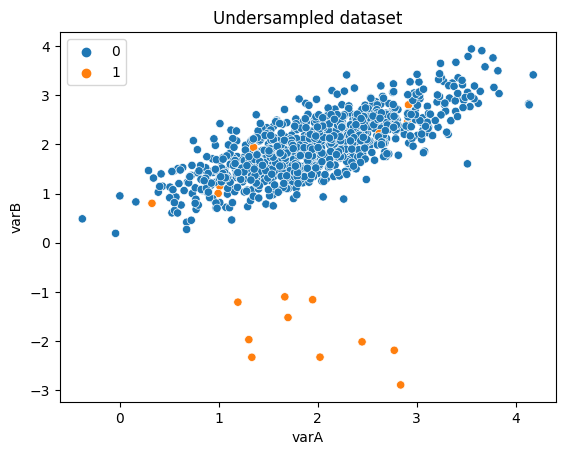

In [7]:
# plot undersampled data

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset')
plt.show()

Note how some yellow dots can now be seen clearer as their neighbouring observations from the other class were removed from the data set.

**HOMEWORK**

- play with the parameters of the Neighbourhood cleaning Rule transformer and examine the size of the returned dataset and the distribution of the samples.

### Partially separated classes

Let's repeat the exercise in data where the classes are not so clearly separated. 

In [8]:
# create data
X, y = make_data(sep=0)

# set up Neighbourhood cleaning rule

ncr = NeighbourhoodCleaningRule(
    sampling_strategy='auto',# undersamples from all classes except minority
    n_neighbors=3, # explores 3 neighbours per observation
    kind_sel='mode', # most neighbouring need to disagree, only applies to cleaning step
                    # alternatively, we can se this to all, and then all neighbours
                    # need to disagree to be removed.
    n_jobs=4, # 4 processors in my laptop
    threshold_cleaning=0.5, # the threshold to evaluate a class for cleaning (used only for clearning step)
) 

X_resampled, y_resampled = ncr.fit_resample(X, y)

In [9]:
# original data

X.shape, y.shape

((1000, 2), (1000,))

In [10]:
# undersampled data

X_resampled.shape, y_resampled.shape

((951, 2), (951,))

As the classes are not so clearly distinguished, more samples were removed from the dataset.

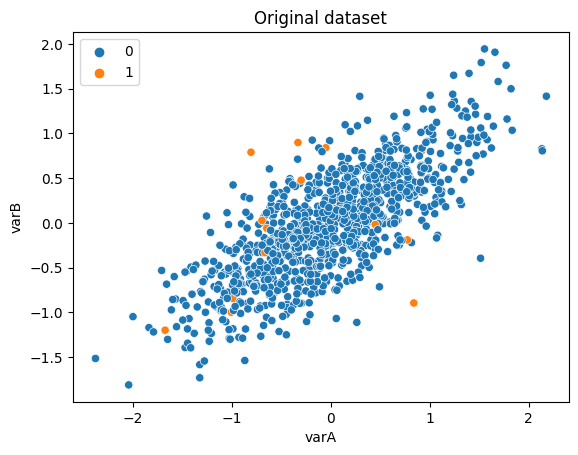

In [11]:
# plot original data

sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )

plt.title('Original dataset')
plt.show()

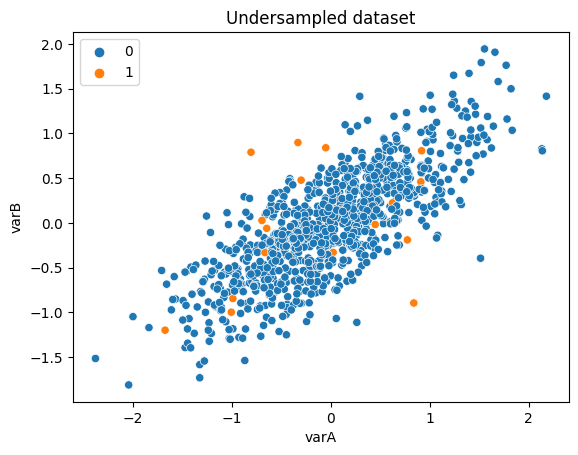

In [12]:
# plot undersampled data

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset') 
plt.show()